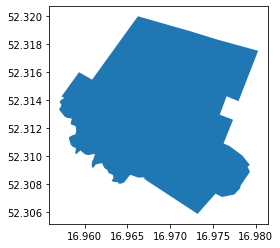

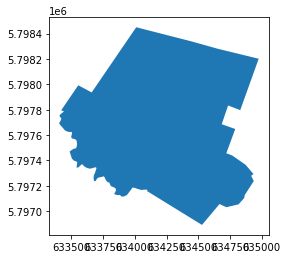

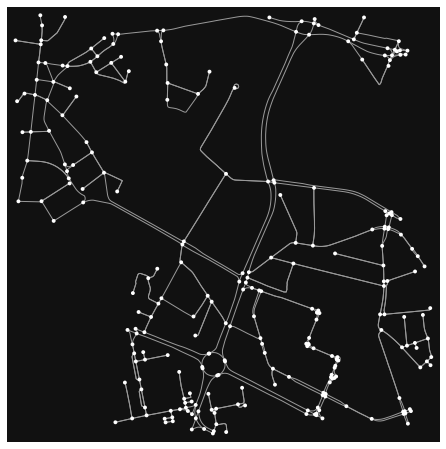

2606


Map(center=[52.4021026, 16.962706], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [2]:
import networkx as nx
import csv
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib;
import pandas as pd 
import matplotlib.pyplot as plt 
from shapely.geometry import LineString, mapping
import geopandas as gpd
from ipyleaflet import *
from ipyleaflet import Map, FullScreenControl, Polyline
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

# Read coordinates
#f = open("coordinates.txt", "r")
#print(f.readline()) 
with open("5.txt", 'r') as f:
    reader = csv.reader(f, delimiter=" ", quoting=csv.QUOTE_NONNUMERIC);
    data_ang = list(reader);

traj_ang = [[x,y] for timestamp,x,y,z in data_ang]


# Converting data to GeoDataFrame
data_ang_timestamp = [item[0] for item in data_ang]
data_ang_lat = [item[1] for item in data_ang]
data_ang_lon = [item[2] for item in data_ang]
data_ang_alt = [item[3] for item in data_ang]

data_ang_df = pd.DataFrame(
{"Timestamp" : data_ang_timestamp,
 "Latitude"  : data_ang_lat,
 "Longitude" : data_ang_lon,
 "Altitude"  : data_ang_alt
})

data_ang_gdf = gpd.GeoDataFrame(
    data_ang_df, geometry=gpd.points_from_xy(data_ang_df.Longitude, data_ang_df.Latitude))
#print(data_ang_df.geometry)
#traj_ang2 = [[x,y] for lat, lon in data_ang_df.geometry]
#print(traj_ang[:10])
#print(traj_ang2[:10])

# Read data converted to UTM using gps_utm ROS package
with open("coordinates_utm.txt", 'r') as f:
    reader = csv.reader(f, delimiter=" ", quoting=csv.QUOTE_NONNUMERIC);
    data_utm = list(reader);

traj_utm = [[x,y] for timestamp,x,y,z in data_utm]

place_name = 'Piotrowo, Poznań'
place_name2 = 'Poznań, Piotrowo 3A'
place_gdf = ox.geocode_to_gdf(place_name)
place_gdf.plot()
# Projects lat long to UTM
ax = ox.project_gdf(place_gdf).plot() 

# Get graph
graph = ox.graph_from_address(place_name2, network_type='drive')
fig, ax = ox.plot_graph(graph)

nodes, edges = ox.graph_to_gdfs(graph)
center = [nodes.iloc[0].geometry.y, nodes.iloc[0].geometry.x]
# #basemaps.OpenStreetMap.Mapnik
# #basemaps.CartoDB.Positron
loc = [[lat,lon] for lat,lon in zip (nodes.geometry.y , nodes.geometry.x)]
print(len(traj_ang))
# Line
line1 = Polyline(
    locations=traj_ang[:],
    color="red",
    fill=False
)
line2 = Polyline(
    locations=traj_ang[477:1000],
    color="red",
    fill=False
)

# Marker
marker = Marker(location=[nodes.iloc[0].geometry.y, nodes.iloc[0].geometry.x], draggable=False)

m = Map(center=center,  basemap=basemaps.OpenStreetMap.Mapnik, zoom=18)
m.add_control(FullScreenControl())
# m.add_layer(marker);

m.add_layer(line1)
#m.add_layer(line2)
m
# m
# to_marker_style = AwesomeIcon(
#     name='circle',
#     icon_color='white',
#     marker_color='red',
#     spin=False
# )

# from_marker = Marker(location=center)
# to_marker = Marker(location=center, icon=to_marker_style)
# def set_nearest_node(marker):
#  marker.nearest_node = ox.get_nearest_node(graph, marker.location)
#  return

# path_layer_list = []
# def handle_change_location(event, marker):
#     event_owner = event['owner']
#     event_owner.nearest_node = ox.get_nearest_node(graph, event_owner.location)
#     marker.nearest_node = ox.get_nearest_node(graph, marker.location)
    
#     shortest_path = nx.dijkstra_path(graph, event_owner.nearest_node, marker.nearest_node, 
#                                      weight='length')
    
#     df = pd.DataFrame(
#         m.remove_layer(path_layer_list[0])
#         path_layer_list.pop()
    
#     shortest_path_points = nodes.loc[shortest_path]
#     path = gpd.GeoDataFrame([LineString(shortest_path_points.geometry.values)], columns=['geometry'])
#     path_layer = GeoData(geo_dataframe=path, style={'color':'black', 'weight':2})
#     m.add_layer(path_layer)
#     path_layer_list.append(path_layer)

# from_marker.observe(lambda event: handle_change_location(event, to_marker), 'location')
# to_marker.observe(lambda event: handle_change_location(event, from_marker), 'location')
# m.add_layer(from_marker)

# m.add_layer(to_marker)
# set_nearest_node(from_marker)
# set_nearest_node(to_marker)
# m.add_control(FullScreenControl())
# m
# m.save('my_map.svg', title='My Map')
# fig, ax = ox.plot_graph(m, save=True, show=False, filepath='image.svg')